In [1]:
import pandas as pd
import sklearn

sklearn.__version__

'1.6.1'

In [4]:
df = pd.read_csv('../Data/salaries_experience.csv')
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
# modelado
# aprendizaje supervisado
# Datos de entrada X
# Datos de salida y
# Algoritmo aprenda los datos y la relación que tiene cada entrada X con cada salida y
# si el algoritmo aprende luego puede predecir nuevas salidas y ante nuevas entradas X

X = df[['YearsExperience']] # necesitamos que sea un dataframe por eso usamos doble corchete
# type(X) es un dataframe
X[:5]

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [9]:
y = df['Salary'] # variable que queremos modelar predecir, puede ser una serie o un array de numpy de una dimensión
y[:5]

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [10]:
from sklearn.linear_model import LinearRegression

# instanciar el algoritmo de regresión lineal
model = LinearRegression()

# entrenar el algoritmo
model.fit(X, y)

# el punto en el eje y donde la recta cruza cuando x = 0
print('Intercepto: (w0 / b0):', model.intercept_)
# tasa de cambio de y por cada unidad de cambio en x: por cada año de experiencia el salario aumenta en 9449 €
print('Coeficiente (w1 / b1):', model.coef_)

Intercepto: (w0 / b0): 25792.20019866871
Coeficiente (w1 / b1): [9449.96232146]


In [13]:
# Realizar una predicción sobre cualquier cantidad de años de experiencia
X_new = pd.DataFrame([5.78, 2.43, 9.77], columns=['YearsExperience'])
X_new

,YearsExperience
0,5.78
1,2.43
2,9.77


In [16]:
X_new['Salary_pred'] = model.predict(X_new)

In [17]:
X_new

,YearsExperience,Salary_pred
0,5.78,80412.982417
1,2.43,48755.608640
2,9.77,118118.332079


In [19]:
experience_years = 5.78
salary = model.intercept_ + model.coef_ * experience_years
salary

array([80412.98241668])

In [20]:
experience_years = 9.77
salary = model.intercept_ + model.coef_ * experience_years
salary

array([118118.33207928])

In [24]:
# para evitar el warning lo ideal es pasarle un DataFrame con las mismas columnas con el que se entrenó
# pd.DataFrame([5.78, 2.43, 9.77], columns=['YearsExperience'])
print(model.predict([[5.78]])) # Aquí le pasamos una nueva X
print(model.predict([[9.77], [2.77]]))

[80412.98241668]
[118118.33207928  51968.5958291 ]


c:\dev\mod5-machine-learning-y-deep-learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\dev\mod5-machine-learning-y-deep-learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
model.predict(pd.DataFrame([5.78, 2.43, 9.77], columns=['YearsExperience']))

array([ 80412.98241668,  48755.6086398 , 118118.33207928])

In [26]:
y_pred = model.predict(X)
y_pred
# mean_absolute_error()

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [27]:
df['Salary_pred'] = model.predict(X)
df.head()

,YearsExperience,Salary,Salary_pred
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


<Axes: xlabel='YearsExperience', ylabel='Salary'>

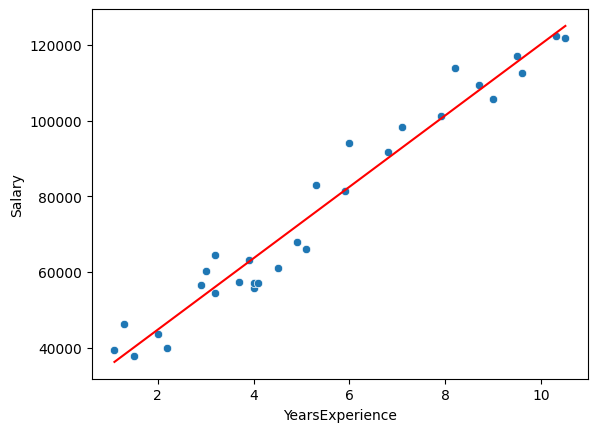

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.scatter(df['YearsExperience'], df['Salary'])
sns.scatterplot(df, x='YearsExperience', y='Salary')
sns.lineplot(df, x='YearsExperience', y='Salary_pred', c='r')

In [41]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

# error absoluto medio: hay un error de unos 4600 € en las predicciones de media
# mean_absolute_error(y, y_pred)
# Cuanto más cercano a 0 mejor, porque indica que hay menos error
mean_absolute_error(df['Salary'], df['Salary_pred'])

4644.2012894435375

In [42]:
# Raíz error cuadrático medio: RMSE (Root mean squared error)
# Penaliza predicciones que tengan un error muy grande, si por ejemplo el modelo se ha equivocado 
# en dos o tres predicciones las penaliza más que la MAE
root_mean_squared_error(y, y_pred)

5592.043608760662

In [39]:
# calidad global: qué tan bien el modelo explica la variabilidad de los datos
# Representa la proporción de la varianza total en la variable dependiente que es explicada por el modelo.
# De 0 a 1
# Cuanto más cercano a 1 mejor:
r2_score(y, y_pred)

0.9569566641435086

In [ ]:
# regresión lineal múltiple: utiliza varios datos de entrada X, por ejemplo varias columnas:

# X = df[['YearsExperience', 'study_level', 'años cotizados', 'age', 'city']]